<a href="https://colab.research.google.com/github/mgultekin/Building-Generative-AI-Applications-with-Gradio/blob/main/ImageCaptioningApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Depth Estimation App


https://huggingface.co/docs/transformers.js/en/pipelines#pipeline-options

In [1]:
# Install necessary packages

!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 671.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [2]:
import os
import io
import IPython
from IPython.display import Image, display, HTML
from PIL import Image
import base64



In [3]:
# Example to use the 'transformers' library for text classificationfrom transformers import pipeline
from transformers import pipeline
from PIL import Image
import requests

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

In [5]:
# Sample image URL for demonstration
image_url = "https://free-images.com/lg/0b0f/tennis_player_caroline_wozniacki.jpg"
display(IPython.display.Image(url=image_url))

In [8]:
image = Image.open(requests.get(image_url, stream=True).raw)

# inference
depth = pipe(image)["depth"]

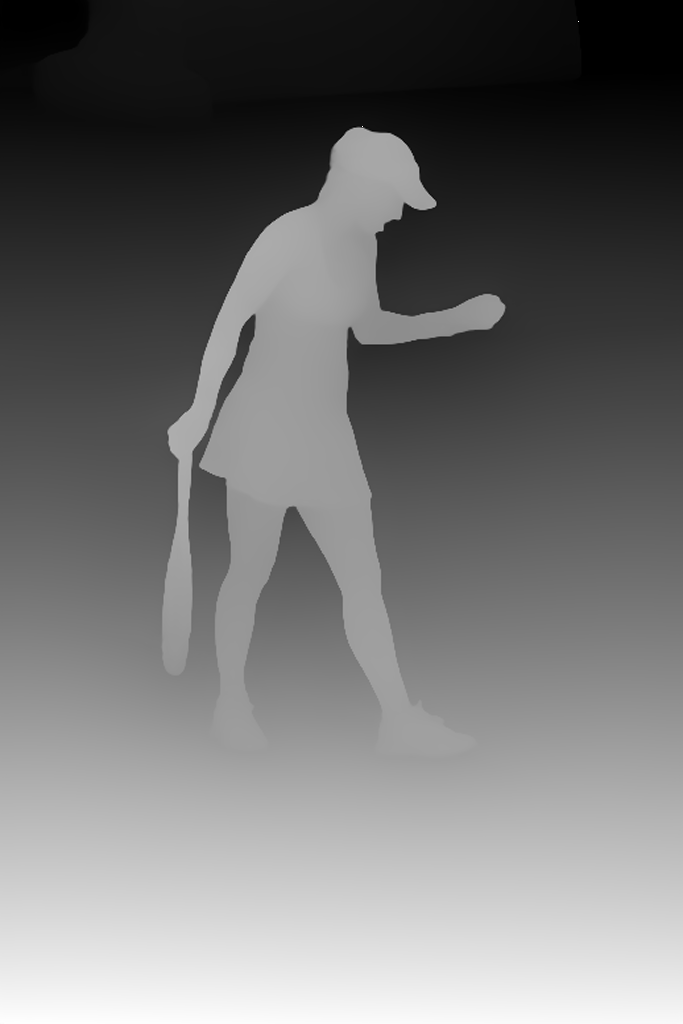

In [9]:
depth

#Gradio Interface

In [13]:

# Function to convert PIL image to base64 string
#def image_to_base64_str(pil_image):
#    byte_arr = io.BytesIO()
#    pil_image.save(byte_arr, format='PNG')
#    byte_arr = byte_arr.getvalue()
#    return str(base64.b64encode(byte_arr).decode('utf-8'))

def detect(image):
    #base64_image = image_to_base64_str(image)
    results = pipe(image)["depth"]
    return results

In [14]:
# Create a Gradio interface to interactively demonstrate the image captioning functionality
import gradio as gr


gr.close_all()
demo = gr.Interface(fn=detect,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Image(label="Image depth", type="pil")],
                    title="Image depth estimation",
                    description="Image depth estimation",
                    allow_flagging="never")

demo.launch(share=True)

Closing server running on port: 7860
Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1848a30dbf1cf932ab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Close all Gradio interfaces after launching the demo
gr.close_all()

Closing server running on port: 7860
